<a href="https://colab.research.google.com/github/DanteNoguez/CalculusRatiocinator/blob/main/notebooks/ensayo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"><b><i> La derivada demostrada según el orden geométrico </b></i></h2> 

<p align="center">A continuación, demostraremos y estudiaremos algunas propiedades de las derivadas con la siguiente función: </p> 

\begin{align}
\ f(x) = 3x^2 - 4x + 5
\end{align}

In [ ]:
!pip install matplotlib --upgrade

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Definimos nuestra función

def f(x):
  return 3*x**2 - 4*x + 5

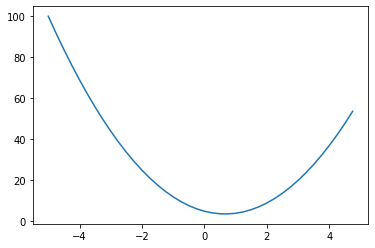

In [3]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

fig, ax = plt.subplots()

ax.plot(xs, ys)
plt.show()

**La derivada de una función se define como:**

\begin{align}
\ f^{\prime}(x)=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}
\end{align}

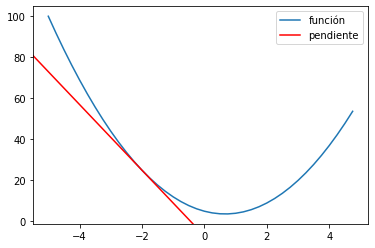

In [4]:
h = 0.00001 # h tiende a 0

# Derivada de f(x)
def dfx(f, x, h):
  return (f(x + h) - f(x)) / h

# Nos enfocaremos en el valor de la derivada cuando x es 2
x1 = -2
derivada1 = dfx(f, x1, h)

fig, ax = plt.subplots()
ax.plot(xs, ys, label='función')
ax.axline((x1, f(x1)), slope=derivada1, color='red', label='pendiente')
#ax.set_xlim(-1.5, -2.5)
#ax.set_ylim(20, 30) 
ax.legend()

**Ahora, intentaremos hacer lo mismo con la fórmula geométrica de la pendiente:**

\begin{align}
\ Pendiente = \frac{y_2 - y_1}{x_2 - x_1}
\end{align}

In [5]:
y2 = f(x1 + h)
y1 = f(x1)
x1 = x1
x2 = x1+h

pendiente1 = (y2-y1) / (x2-x1)
pendiente1, derivada1

(-15.999970000175153, -15.999970000279971)

### Demostración

En realidad, cada valor de la fórmula de una función es equivalente a cada valor de la fórmula de la pendiente, de tal forma que:



\begin{align}
\ f(x+h) = y_2 \\
\ f(x) = y_1 \\
\ h = x_2 - x_1 \\
\end{align}

In [6]:
print(f"""
Valores comparados:
f(x+h): {f(x1+h)} = y2: {y2}
f(x): {f(x1)} = y1: {y1}
h: {h} = x2-x1: {x2-x1}""")


Valores comparados:
f(x+h): 24.999840000299997 = y2: 24.999840000299997
f(x): 25 = y1: 25
h: 1e-05 = x2-x1: 1.0000000000065512e-05


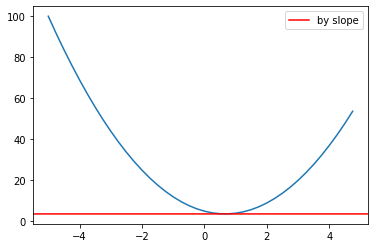

In [7]:
# Finalmente, visualicemos la pendiente cuando x es igual a 2/3

xn = 2/3
pendienten = dfx(f, xn, h)

xs = np.arange(-5, 5, 0.25)
ys = f(xs)

fig, ax = plt.subplots()

ax.plot(xs, ys)
ax.axline((xn, f(xn)), slope=pendienten, color='red', label='by slope')
ax.legend()

### Ahora haremos derivadas un poco más complejas: con funciones de dos variables (x, y).

La fórmula de la derivada con respecto a $x$ es: 

\begin{equation}
\frac{\partial f(x, y)}{\partial x}=\frac{f(x+h, y)-f(x, y)}{h}
\end{equation}

Y la derivada con respecto a $y$:

\begin{equation}
\frac{\partial f(x, y)}{\partial y}=\frac{f(x, y+h)-f(x, y)}{h}
\end{equation}


In [8]:
# Definimos una función que multiplica x e y

def fmult(x, y):
  return x * y + 10

x = -2
y = 3

# Definimos la derivada de esa función con respecto a x
def dmultx(f, x, y, h):
  return ((f(x+h, y) - f(x, y)) / h)

resultado = dmultx(fmult, x, y, h)
resultado

3.000000000064062

In [9]:
# La derivada con respecto a y
def dmulty(f, x, y, h):
  return ((f(x, y+h) - f(x, y)) / h)

resultado2 = dmulty(fmult, x, y, h)
resultado2

-2.0000000000131024

In [12]:
# Por simplicidad, podemos descomponer esta función en dos:

def mult(x, y):
  return x*y


def multsum(x, y):
  paso1 = mult(x, y)
  paso2 = sum(paso1, 10)
  return paso2

# PEQUEGRAD

In [27]:
#%%writefile pequegrad.py
import math

class Valor:
  def __init__(self, valor, _valores=(), _op='', etiqueta=''):
    self.valor = valor
    self.grad = 0.0 # gradiente
    self._backward = lambda: None # el valor predeterminado es nulo
    self._previos = set(_valores)
    self._op = _op
    self.etiqueta = etiqueta

  def __repr__(self):
    return f'Valor({self.valor})'

  def __add__(self, otro): # self + otro
    otro = otro if isinstance(otro, Valor) else Valor(otro)
    resultado = Valor(self.valor + otro.valor, (self, otro), '+')

    def _backward():
      self.grad += 1.0 * resultado.grad
      otro.grad += 1.0 * resultado.grad
    resultado._backward = _backward

    return resultado

  def __mul__(self, otro): # self * otro
    otro = otro if isinstance(otro, Valor) else Valor(otro)
    resultado = Valor(self.valor * otro.valor, (self, otro), '*')

    def _backward():
      self.grad += otro.valor * resultado.grad
      otro.grad += self.valor * resultado.grad
    resultado._backward = _backward

    return resultado

  def __pow__(self, otro): # self ** otro
    assert isinstance(otro, (int, float))
    resultado = Valor(self.valor**otro, (self,), f'**{otro}')

    def _backward():
      self.grad += otro * (self.valor ** (otro - 1)) * resultado.grad
    resultado._backward = _backward

    return resultado

  def __radd__(self, otro):
    return self + otro

  def __rmul__(self, otro): # self * otro
    return self * otro

  def __truediv__(self, otro): # self / otro
    return self * otro**-1

  def __neg__(self):
    return self * -1

  def __sub__(self, otro): # self - otro
    return self + (-otro)

  def __rsub__(self, otro):
    return otro + (-self)

  def __rtruediv__(self, otro):
    return otro * self**-1

  def tanh(self): # tangente hiperbólica
    x = self.valor
    t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
    resultado = Valor(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * resultado.grad #según la fórmula 1-tanh**2x
      
    resultado._backward = _backward
    
    return resultado

  def exp(self):
    x = self.valor
    resultado = Valor(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += resultado.valor * resultado.grad
    resultado._backward = _backward

    return resultado

  def backward(self):
    topo = [] # haremos un ordenamiento topológico de los valores (los pondremos en orden 'cronológico')
    visitados = set()
    def construir_topo(v):
      if v not in visitados:
        visitados.add(v)
        for valores in v._previos:
          construir_topo(valores)
        topo.append(v)
    construir_topo(self)

    self.grad = 1.0 # asignamos valor de 1 para inicializar la propagación

    for nodo in reversed(topo): # comenzamos desde adelante hacia atrás
      nodo._backward()

In [14]:
a = Valor(2.0)
b = Valor(3.0)
a / b

Valor(0.6666666666666666)

In [15]:
a = Valor(2.0, etiqueta='a')
b = Valor(-3.0, etiqueta='b')
c = Valor(10.0, etiqueta='c')
e = a*b; e.etiqueta='e'
d = e+c; d.etiqueta='d'
f = Valor(-2.0, etiqueta='f')
L = d * f; L.etiqueta='L'
a * b + c, (a.__mul__(b)).__add__(c)

(Valor(4.0), Valor(4.0))

In [16]:
d = a * b + c
d._previos, d._op

({Valor(-6.0), Valor(10.0)}, '+')

In [17]:
from graphviz import Digraph

def rastreo(origen):
  # construye un conjunto de todos los nodos en un gráfico
  nodos, lineas = set(), set()
  def construir(v):
    if v not in nodos:
      nodos.add(v)
      for parte in v._previos:
        lineas.add((parte, v))
        construir(parte)
  construir(origen)
  return nodos, lineas

def graficar(origen):
  grafica = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # left to right, izquierda a derecha

  nodos, lineas = rastreo(origen)
  for n in nodos:
    uid = str(id(n))
    # por cada valor en la grafica, crea un nodo rectangular ('record') para él
    grafica.node(name=uid, label='{ %s | valor %.4f | grad %.4f }' % (n.etiqueta, n.valor, n.grad), shape='record')
    if n._op:
      # si el valor es resultado de una operación, crea un nodo para la operación
      grafica.node(name = uid + n._op, label = n._op)
      # conecta los nodos
      grafica.edge(uid + n._op, uid)

  for n1, n2 in lineas:
    # conecta n1 al nodo operación de n2
    grafica.edge(str(id(n1)), str(id(n2)) + n2._op)

  return grafica

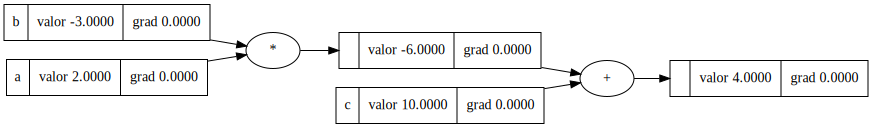

In [18]:
graficar(d)

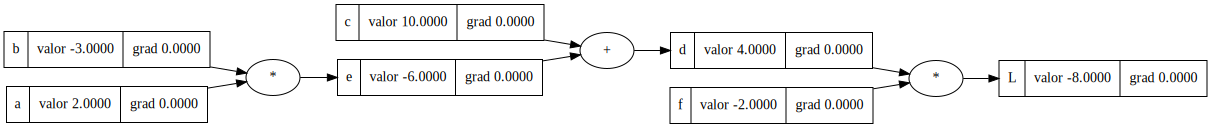

In [19]:
graficar(L)

In [20]:
def jaja():
  h = 0.00001

  a = Valor(2.0, etiqueta='a')
  b = Valor(-3.0, etiqueta='b')
  c = Valor(10.0, etiqueta='c')
  e = a*b; e.etiqueta='e'
  d = e+c; d.etiqueta='d'
  f = Valor(-2.0, etiqueta='f')
  L = d * f; L.etiqueta='L'
  L1 = L.valor

  a = Valor(2.0, etiqueta='a')
  b = Valor(-3.0, etiqueta='b')
  b.valor += h
  c = Valor(10.0, etiqueta='c')
  e = a*b; e.etiqueta='e'
  d = e+c; d.etiqueta='d'
  f = Valor(-2.0, etiqueta='f')
  L = d * f; L.etiqueta='L'
  L2 = L.valor

  print((L2 - L1)/h)


jaja()

-4.000000000026205


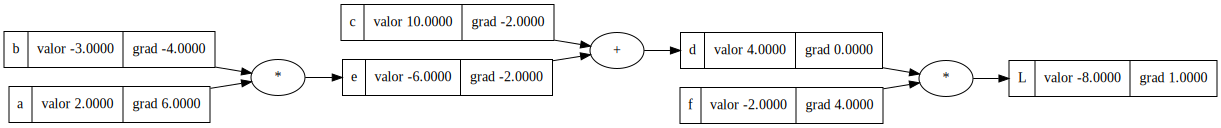

In [21]:
# BACKPROP

L.grad = 1.0 # derivada de L sobre sí misma es 1
f.grad = d.valor # derivada de los valores que se multiplican es la recíproca
d.grad = f.valor
c.grad = d.grad # derivada de valores sumados es la derivada del valor producido (porque se multiplican las locales entre sí y la derivada de la suma es 1)
e.grad = d.grad
a.grad = b.valor * e.grad
b.grad = a.valor * e.grad
graficar(L)

In [22]:
# FORWARD PASS CON UN STEP (EPOCH?)

a.valor += 0.01 * a.grad
b.valor += 0.01 * b.grad
c.valor += 0.01 * c.grad
f.valor += 0.01 * f.grad
e = a*b; e.etiqueta='e'
d = e+c; d.etiqueta='d'
L = d * f; L.etiqueta='L'

print(L.valor)

-7.286496


Ejemplo:

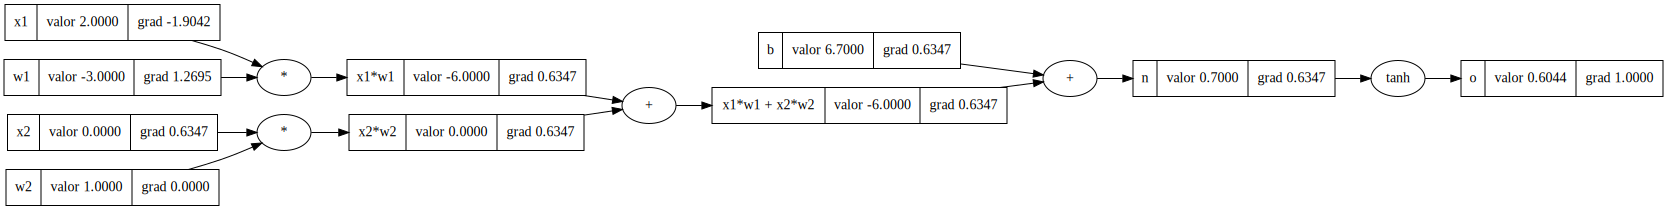

In [52]:
x1 = Valor(2.0, etiqueta='x1')
x2 = Valor(0.0, etiqueta='x2')

w1 = Valor(-3.0, etiqueta='w1')
w2 = Valor(1.0, etiqueta='w2')

b = Valor(6.7, etiqueta='b')

x1w1 = x1*w1; x1w1.etiqueta = 'x1*w1'
x2w2 = x2*w2; x2w2.etiqueta = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.etiqueta = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.etiqueta='n'
o = n.tanh(); o.etiqueta='o'

o.backward()

graficar(o)

In [24]:
o.grad = 1.0
n.grad = 1 - o.valor**2


x1w1x2w2.grad = n.grad
b.grad = n.grad


x1w1.grad = n.grad
x2w2.grad = n.grad

w2.grad = x2.valor * x2w2.grad
x2.grad = w2.valor * x2w2.grad
w1.grad = x1.valor * x1w1.grad
x1.grad = w1.valor * x1w1.grad

In [129]:
import random

class Neurona:
  def __init__(self, nin):
    self.w = [Valor(random.uniform(-1, 1)) for n in range(nin)]
    self.b = Valor(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    activacion = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    resultado = activacion.tanh()
    return resultado

  def parametros(self):
    return self.w + [self.b]

class Capa:
  def __init__(self, nin, nout):
    self.neuronas = [Neurona(nin) for n in range(nout)]

  def __call__(self, x):
    resultado = [neurona(x) for neurona in self.neuronas]
    return resultado[0] if len(resultado) == 1 else resultado

  def parametros(self):
    return [parametro for n in self.neuronas for parametro in n.parametros()]

class MLP: # Perceptrón multicapa
  def __init__(self, nin, nouts):
    tamaño = [nin] + nouts
    self.capas = [Capa(tamaño[i], tamaño[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for capa in self.capas:
      x = capa(x)
    return x

  def parametros(self):
    return [parametro for capa in self.capas for parametro in capa.parametros()]

In [130]:
x = [2.0, 3.0, -1.0] # Tres inputs
n = MLP(3, [4, 4, 1]) # Tres inputs, 2 capas de 4 neuronas, un output
n(x)

Valor(0.4413832548244455)

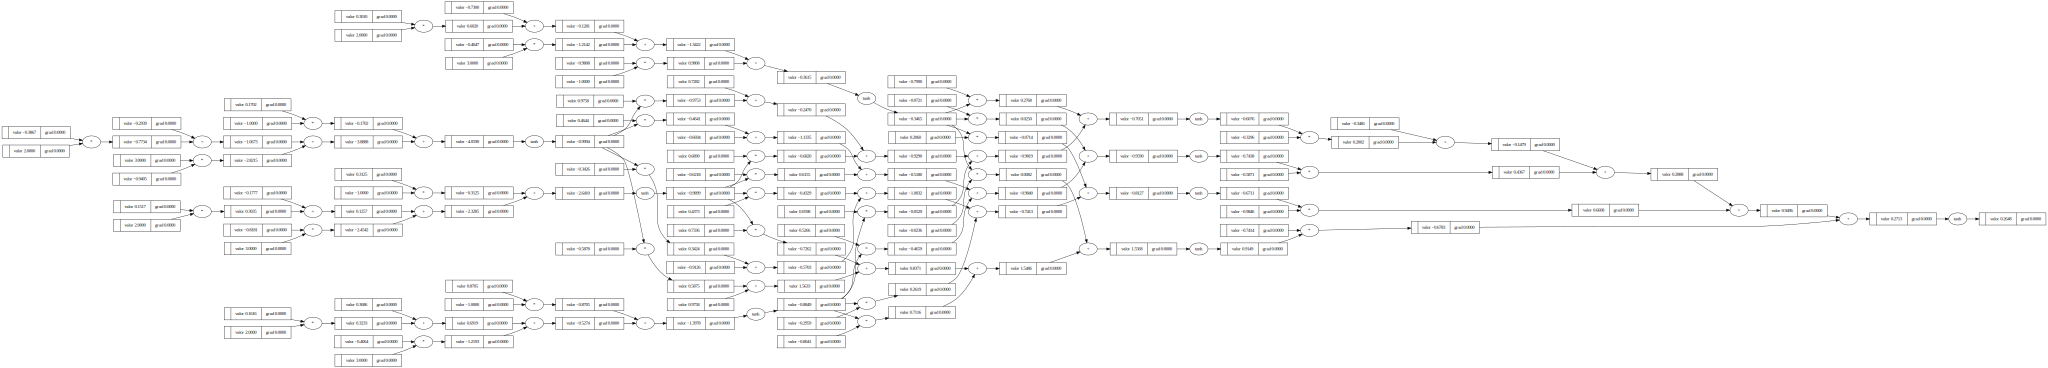

In [76]:
graficar(n(x))

In [131]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],]
ys = [1.0, -1.0, -1.0, 1.0]

ypred = [n(x) for x in xs]
ypred

[Valor(0.4413832548244455),
 Valor(0.4383307207015986),
 Valor(0.7121099719595448),
 Valor(0.32332178439280274)]

In [78]:
perdida = [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)] #MSE

fn_perdida = sum(perdida)
fn_perdida

Valor(3.160949185490015)

In [79]:
fn_perdida.backward()

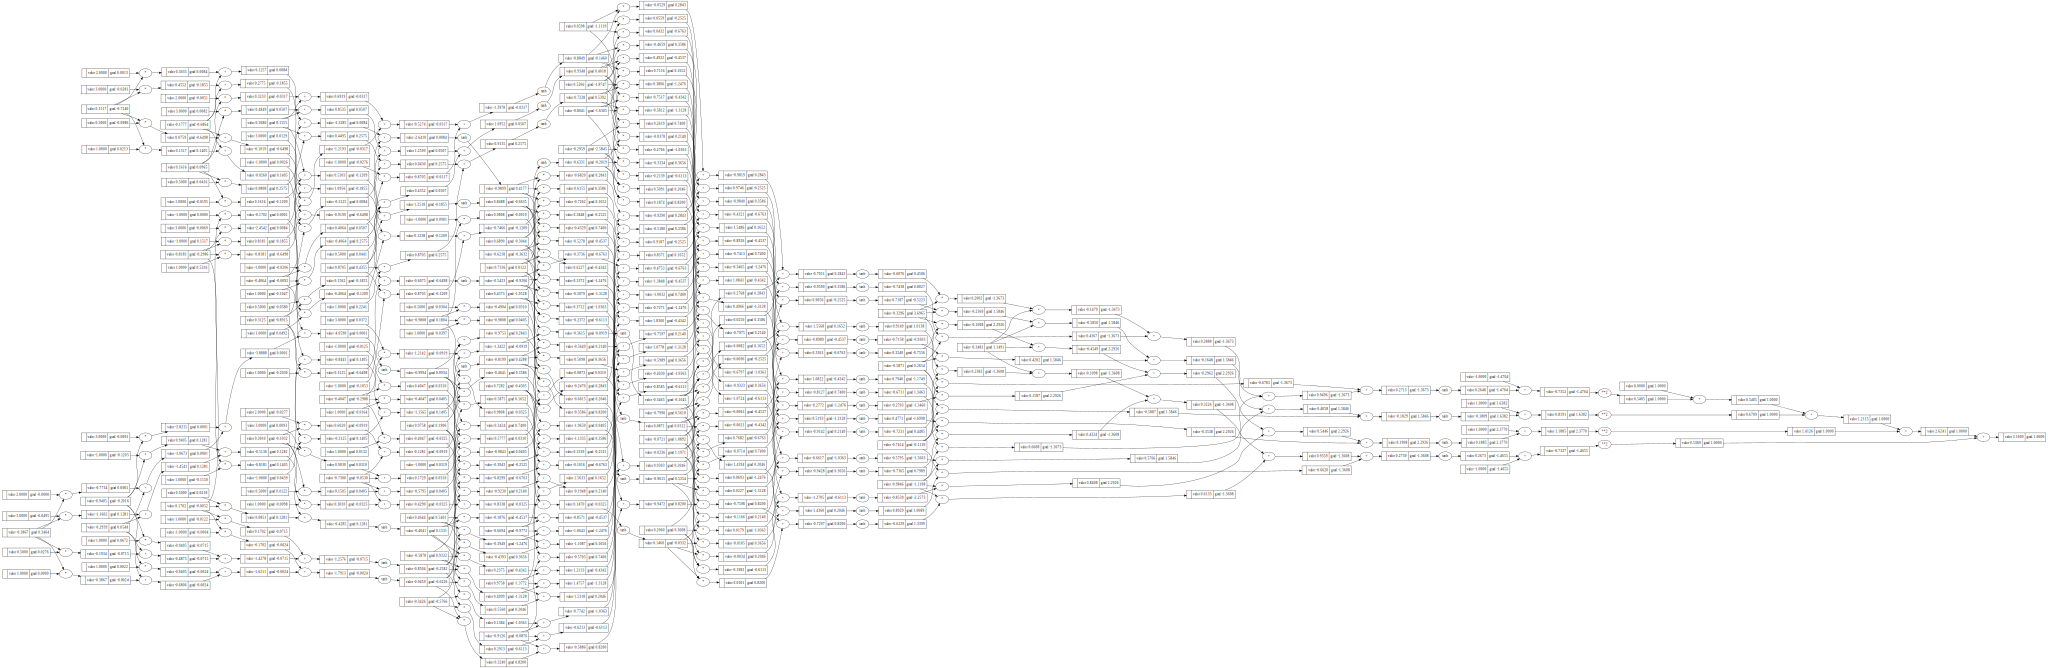

In [80]:
graficar(fn_perdida)

In [84]:
n.capas[0].neuronas[0].w[0].grad, n.capas[0].neuronas[0].w[0].valor

(0.3464252032634815, -0.38672312013823595)

In [117]:
ypred = [n(x) for x in xs]

perdida = [(yout - ygt)**2 for ygt, yout in zip(ys, ypred)] #MSE

fn_perdida = sum(perdida)
fn_perdida

Valor(7.76299207533069e-05)

In [118]:
fn_perdida.backward()

In [119]:
for p in n.parametros():
  p.valor += -0.1 * p.grad

In [120]:
n.capas[0].neuronas[0].w[0].grad, n.capas[0].neuronas[0].w[0].valor

(0.16235354899029114, -0.4411870620530029)

In [121]:
ypred

[Valor(0.9946232013005437),
 Valor(-0.9994043208249274),
 Valor(-0.9994419811255868),
 Valor(0.9930679196661453)]

In [139]:
for k in range(20):

  # paso hacia delante
  ypred = [n(x) for x in xs]
  perdida = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) #MSE

  # propagación hacia atrás
  for p in n.parametros():
    p.grad = 0.0
  perdida.backward()

  # actualización (SGD)
  for p in n.parametros():
    p.valor += -0.05 * p.grad

  print(k, perdida.valor)

0 0.010782637915310913
1 0.010625575322166781
2 0.010472915758355463
3 0.010324478372574998
4 0.010180092035039327
5 0.010039594694877163
6 0.009902832787739084
7 0.009769660689099915
8 0.009639940209203094
9 0.009513540125996603
10 0.00939033575277341
11 0.009270208537547365
12 0.009153045691485028
13 0.009038739843966316
14 0.008927188722077616
15 0.008818294852544293
16 0.008711965284293823
17 0.008608111330004303
18 0.008506648325142413
19 0.008407495403127107


In [140]:
ypred

[Valor(0.9621848367647805),
 Valor(-0.9586654944208661),
 Valor(-0.9508261847306948),
 Valor(0.9466061485467698)]